<a href="https://colab.research.google.com/github/TheMonarch00/ASL_Classification_Using_SVM/blob/main/ASL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%ls /content/drive/MyDrive/Alphabets

A/  C/  E/        F/  H/  I89.jpg  K/  M/  O/  Q/  S/  U/  W/  Y/
B/  D/  E248.jpg  G/  I/  J/       L/  N/  P/  R/  T/  V/  X/  Z/


In [5]:
# Importing required libraries and methods
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread


In [6]:
# Importing the data, resizing and flattening
target = []
images = [] #matrix format of the image
flat_data = []
DATADIR = '/content/drive/MyDrive/Alphabets'

CATAGORIES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

for i in CATAGORIES:
  class_target = CATAGORIES.index(i) #label encoded the target value
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(300,300,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    #print(img_resized.shape)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
# Creating a dataframe
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,269961,269962,269963,269964,269965,269966,269967,269968,269969,269970,269971,269972,269973,269974,269975,269976,269977,269978,269979,269980,269981,269982,269983,269984,269985,269986,269987,269988,269989,269990,269991,269992,269993,269994,269995,269996,269997,269998,269999,Target
0,0.004139,0.008715,0.988562,0.008497,0.009150,0.985294,0.017647,0.008932,0.975381,0.028105,0.005447,0.955338,0.025490,0.007843,0.948693,0.017756,0.012418,0.946078,0.007734,0.017647,0.942157,0.004248,0.023856,0.942157,0.004248,0.029412,0.944009,0.008170,0.032026,0.947495,0.008497,0.025817,0.948039,0.008170,0.017320,0.947930,0.009477,0.010784,0.948802,0.011111,...,0.138235,0.131590,0.772113,0.134314,0.135076,0.767756,0.126471,0.134641,0.765033,0.120915,0.133007,0.763943,0.126144,0.131699,0.766122,0.133987,0.130392,0.773203,0.142919,0.129303,0.780501,0.152505,0.128867,0.783551,0.147712,0.126144,0.779739,0.138126,0.126688,0.783769,0.128540,0.139325,0.818192,0.064052,0.086601,0.842157,0.022658,0.049346,0.852397,0
1,0.000436,0.011438,0.989216,0.001307,0.010784,0.987255,0.004248,0.008824,0.979194,0.010784,0.004902,0.958715,0.011111,0.007843,0.948366,0.009041,0.014488,0.942702,0.005991,0.025381,0.940959,0.004575,0.032353,0.943464,0.005011,0.031590,0.944989,0.009368,0.011547,0.939325,0.012418,0.005882,0.943137,0.013617,0.005991,0.948257,0.010566,0.009041,0.947821,0.007190,...,0.132026,0.128431,0.768410,0.132026,0.121895,0.785839,0.131699,0.126144,0.782680,0.132135,0.133442,0.774183,0.135185,0.139107,0.770261,0.136601,0.133987,0.765033,0.140305,0.127560,0.763399,0.152505,0.127996,0.773856,0.151307,0.125817,0.785294,0.142593,0.123638,0.800109,0.124728,0.124074,0.824074,0.061438,0.079085,0.844771,0.022222,0.049020,0.854575,0
2,0.001416,0.021786,0.974946,0.004248,0.019608,0.977124,0.012418,0.013834,0.975599,0.028105,0.003813,0.956427,0.039216,0.002288,0.949346,0.040523,0.004357,0.946623,0.016993,0.008715,0.944880,0.008824,0.012418,0.943464,0.007081,0.015577,0.942810,0.009259,0.017756,0.944118,0.008170,0.018301,0.946732,0.006972,0.017647,0.949129,0.008715,0.015033,0.949564,0.009477,...,0.135948,0.124074,0.775163,0.141176,0.126253,0.780392,0.141830,0.131373,0.777124,0.139542,0.134532,0.769172,0.133007,0.128867,0.755664,0.138562,0.128105,0.754575,0.149129,0.129412,0.759368,0.162636,0.132026,0.769390,0.153268,0.126144,0.775817,0.136928,0.121569,0.787582,0.122549,0.129412,0.818954,0.060784,0.081046,0.837582,0.022004,0.047495,0.844771,0
3,0.000436,0.039216,0.994989,0.001307,0.032680,0.991503,0.004031,0.019499,0.980174,0.009695,0.005991,0.955773,0.012092,0.006536,0.947712,0.012309,0.013290,0.946078,0.009259,0.024619,0.947386,0.007190,0.025817,0.945752,0.006427,0.023965,0.944771,0.008606,0.023094,0.948693,0.009477,0.018627,0.948693,0.009695,0.013181,0.947059,0.009259,0.008388,0.944444,0.009804,...,0.139542,0.131373,0.770588,0.138235,0.131373,0.778431,0.132680,0.136275,0.775817,0.125163,0.140959,0.768083,0.116013,0.140087,0.755447,0.121569,0.137255,0.757190,0.133660,0.134967,0.765142,0.150654,0.136275,0.777342,0.148366,0.124183,0.783660,0.139434,0.113290,0.794662,0.129847,0.119390,0.825599,0.065686,0.072876,0.848039,0.024510,0.040850,0.857843,0
4,0.000327,0.033442,0.987473,0.000980,0.023203,0.983333,0.004357,0.006972,0.974619,0.013943,0.003486,0.964597,0.016340,0.003595,0.957516,0.014379,0.005229,0.951416,0.006536,0.007843,0.945316,0.003595,0.016340,0.946732,0.003050,0.024183,0.949564,0.004793,0.024183,0.949129,0.005882,0.020261,0.950327,0.006754,0.015468,0.952614,0.007625,0.011983,0.956536,0.006863,...,0.108497,0.107625,0.747712,0.098039,0.106754,0.755556,0.093464,0.115359,0.751961,0.091394,0.125708,0.745316,0.090959,0.131808,0.740959,0.096078,0.127778,0.738562,0.104248,0.118954,0.737473,0.116013,0.105882,0.738344,0.125163,0.103922,0.752941,0.126906,0.104684,0.776580,0.109041,0.102505,0.813617,0.053922,0.064706,0.843791,0.020153,0.039869,0.857734,0
...,...,..

In [8]:
unique,count = np.unique(target, return_counts=True)

In [9]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 1, stratify = target)

In [ ]:
# Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'kernel' : ['linear','rbf'],
    'C' : [0.1,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv = 5)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [11]:
# Fitting the data into model
from sklearn.svm import SVC
model = SVC(C=10, kernel='rbf')
model.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = model.predict(x_test)
y_pred

array([14, 14, 23, 15, 15, 20, 23,  5, 12, 10, 13, 16,  1, 23, 12,  6,  7,
       12,  1,  7, 15, 19, 23,  9,  4,  5, 10, 18, 11,  6,  1, 21,  1, 17,
        7, 17, 22,  2,  2,  7,  1,  5, 18, 19,  5,  4, 13, 24,  2, 16, 24,
       17,  1, 18, 22, 11, 25, 12, 11,  1, 20,  9,  4,  8, 16,  7, 16, 10,
       25, 22, 24,  8, 10, 17,  5, 24, 20,  0, 12, 22, 18, 16, 10,  0, 11,
        4, 14, 14, 16,  9,  7,  3,  5,  2, 12, 20, 23, 10, 21, 14, 11, 12,
       13,  8,  2,  3, 15, 13, 22, 14, 21,  8,  4,  1, 19, 18,  9,  6, 13,
       21,  3, 23, 12, 10, 18, 13, 15,  5, 11, 20,  7,  6,  6, 23,  7,  1,
        8,  4, 21,  4, 25, 15, 20,  6, 19,  4, 11, 15, 12,  4, 18, 16,  5,
        9, 14, 12, 25, 22,  1,  1,  2,  7,  8,  9,  0, 19,  9, 21, 20, 25,
       13, 16, 17,  3, 19, 22, 25, 14, 21,  7, 21,  0, 18,  3, 19,  8,  5,
        2,  7,  3, 12, 25, 10, 21,  0,  1, 22,  2,  2,  0, 18, 15,  4, 24,
       20,  6, 25,  9, 15,  3, 11, 22, 13, 10, 13,  3, 17, 17, 16,  7,  9,
       14,  8, 17, 17,  3

In [13]:
# Evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 

In [14]:
accuracy_score(y_test,y_pred)

1.0

In [15]:
# Saving the model using pickle library
import pickle
pickle.dump(model,open('sign_language_recognition.p','wb'))

In [16]:
Sign_language = pickle.load(open('sign_language_recognition.p','rb'))

Enter your URL/content/drive/MyDrive/Alphabets/J/J1003.jpg
PREDICTED OUTPUT : J


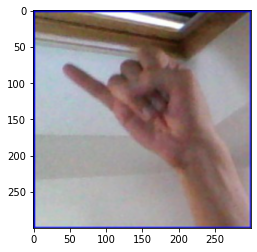

In [18]:
# Testing brand new image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(300,300,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
y_out = Sign_language.predict(flat_data)
y_out = CATAGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')